# Part 2: A short data story / micro-project

### Exercise: 

Create a short data-story based on the work we've done in class so far. (This exercise is a kind of "micro version" of what we'll be doing in the final project). Follow the directions in the bulleted list below when you create your data-story.

* __Find your own story to tell in the work on analyzing the SF Crime Data that we've done so far__ (Week 1 - Week 6). The idea is to choose an insight about crime in SF (perhaps how something changed over the years) and communicate that insight to a general audience reader.
* The web-page should be hosted on your GitHub Pages site (Week 7).
* The format must be the classic Magazine Genre presented on a single web-page (see the Segel & Heer paper for details).
* The story should have a brief introduction to the dataset so new readers from outside the class can understand what's going on.
* Your story should include three visualizations. Not more than three, not less than three (but multi-panel figures are OK). The figures should be one of each of the following types
    * One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4).
    * One map (use techniques from Week 3 and 4)
    * One interactive visualization in Bokeh (Week 6)

* __At a minimum, the Bokeh visualization should contain different data__ than the exercise we did for Week 6 (it's a plus if it's a new type of viz altogether).
* The two other visualization may be repetitions of figures created during the previous lectures, or they may be new.
* Make the figures nice. Specifically:
    * Aim to make the figures visually consistent (color, fonts, etc)
    * Follow the recommendations from my video on nice figures (Week 2, part 3)
* In terms of the amount of text, I envision something like 500-1500 words (including figure captions). Try to write in your own words - the LLMs have a tendency to write a lot of text and not be so precise. So if the writing is all elegantly written but empty prose, we will be critical. It is OK, however, to have the LLM help you get the grammer, etc. right.
* It is a plus if you can back up some of your findings with external sources, such as news stories from the area, looking up which building is located at some set of lat,lon coordinates, or similar. (So when you see something happening at some time/place in the data, see if you can understand it more deeply by investigating outside the dataset.) Use real references at the end of the text to organize your links to the outside world.

### Brief introduktion to thee dataset

The data that we are working with in this project is *\*Police Department Incident Reports: Historical 2003 to May 2018\**, which is provided by the City and County of San Francisco. The data is about historical reported crimes in San Francisco. It contains 14 columns, each providing essential infomation about the observation, such as time, position and categori of the crime. In this project, we will be focusing on the crime category prostitution and explore how this crime has developed over time.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
## Load files

file = "..\..\Data\Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv"
crime = 'PROSTITUTION'

df = pd.read_csv(file)
df = df[df['Date'].str.contains('2018') == False]

focuscrimes = set([crime])
focusdf = df[df['Category'].isin(focuscrimes)]

_One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4)._


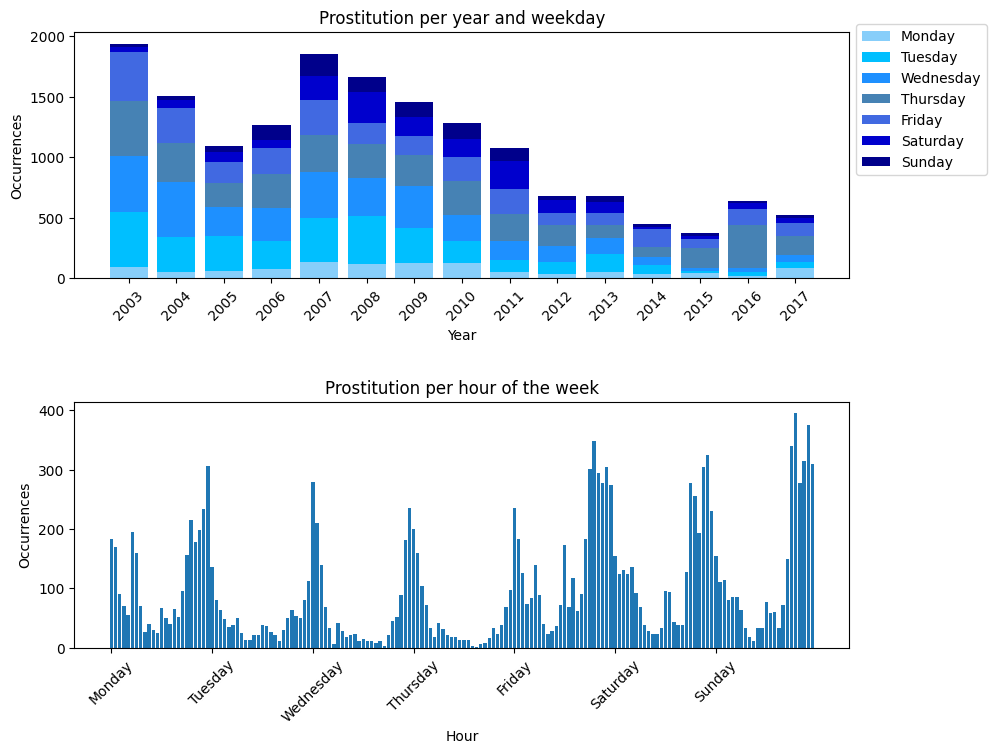

<Figure size 640x480 with 0 Axes>

In [66]:
## Amount of focuscrimes per year
years = focusdf[focusdf['Category'] == crime]['Date'].str.split('/').str[2].value_counts().sort_index()

## Amount of focuscrimes per weekday per year
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_weekday_list = np.zeros((len(weekdays), len(years)))

for idx, year in enumerate(years.index):
    # print(idx,year)
    crime_weekday = focusdf[(focusdf['Category'] == crime) & (focusdf['Date'].str.split('/').str[2] == year)]['DayOfWeek'].value_counts()
    crime_weekday = np.array(crime_weekday.reindex(index=weekdays))
    crime_weekday_list[:,idx] = crime_weekday

## Create a new column with the weekday and hour
focusdf['Weekday_Hour'] = focusdf['DayOfWeek'] + '_' + focusdf['Time'].str.split(':').str[0]
hour_of_week = focusdf[focusdf['Category'] == crime]['Weekday_Hour'].value_counts().sort_index()



## Plotting
fig, ax = plt.subplots(2,1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots
colors = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'steelblue', 'royalblue', 'mediumblue', 'darkblue']


## Create bar plot
for i, weekday in enumerate(weekdays):
    if i == 0:
        ax[0].bar(years.index, crime_weekday_list[i,:], label=weekday, color=colors[i])
    else : 
        ax[0].bar(years.index, crime_weekday_list[i,:], bottom=np.sum(crime_weekday_list[:i,:], axis=0), label=weekday, color=colors[i])
        
# Set the labels and title
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Occurrences')
ax[0].set_title('Prostitution per year and weekday')
ax[0].set_xticklabels(years.index, rotation=45)
ax[0].legend(loc='upper left', bbox_to_anchor=(1,1.06))



## Create a hourly week plot
ax[1].bar(hour_of_week.index, hour_of_week)
ax[1].set_title('Prostitution per hour of the week')
ax[1].set_ylabel('Occurrences')
ax[1].set_xlabel('Hour')
ax[1].set_xticks(np.arange(0, len(hour_of_week.index), 24))
ax[1].set_xticklabels(weekdays, rotation=45)

# Show the plot
plt.show()


## Save the plot
plt.savefig('plot1.png')

### _Comments for plot 1_

_First plot_
- General: Most crimes in 2003 and less crimes in 2015. Summing the amout of crimes over the years, we see that there are most crimes at Thursdays (3630 crimes) and less crimes on Sundays (1059 crimes).

- Amout of prostitution on Saturday are low the first four years, and then in 2007 it increases a lot. It is first in 2014 and furter that it is back to the same amount as in 2003-2006.

- Notable that the there are a high amount of prostitutions in the weekdays; Tuesday, Wednesday and Thursday. 

- Another interesting thing is in 2016, where Thursday is clearly the dominating weekday, where the crimes happens. 

_Second plot_

- In general most frequent around midnight and during the night hours. 

- Less crimes in the morning and during the days. 

- In contrast to the first plot, it looks like there are more crimes in the weekend that the rest of the week (but this is not true). 

Monday = 1123 crimes\
Tuesday = 3003 crimes\
Wednesday = 3291 crimes\
Thursday = 3630 crimes\
Friday = 2776 crimes\
Saturday = 1571 crimes\
Sunday = 1059 crimes

_One map (use techniques from Week 3 and 4)_


_One interactive visualization in Bokeh (Week 6)_

In [46]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.sampledata.commits import data
from bokeh.transform import jitter

# Convert 'Time' to datetime and extract 'HourOfDay'
focusdf['Time'] = pd.to_datetime(focusdf['Time'])
focusdf['HourOfDay'] = focusdf['Time'].dt.hour

# Group data
grouped_data = focusdf.groupby(['HourOfDay', 'DayOfWeek']).size().unstack()

# Reorder columns based on the order of days
grouped_data = grouped_data[weekdays]

# Create ColumnDataSource
source = ColumnDataSource(grouped_data)

# Create figure
p = figure(width=800, height=300, y_range=weekdays, x_axis_type='datetime', title="Title")

# Scatter plot with jitter
for i, day in enumerate(weekdays):
    p.scatter(x=day, y=jitter('HourOfDay', width=0.6, range=p.y_range), source=source, alpha=0.3)

p.xaxis.formatter.days = '%Hh'
p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

print(grouped_data)


C:\Users\KatjaNorsker\AppData\Local\Temp\ipykernel_3652\4118170494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focusdf['Time'] = pd.to_datetime(focusdf['Time'])
C:\Users\KatjaNorsker\AppData\Local\Temp\ipykernel_3652\4118170494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focusdf['HourOfDay'] = focusdf['Time'].dt.hour


DayOfWeek  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
HourOfDay                                                                
0             136      154        155       235     183       279     200
1              81      125        111       184     170       210     160
2              64      131        115       126      90       140     105
3              48      124         81        74      71        69      73
4              36      136         85        84      55        34      34
5              38       92         85       140     195         6      18
6              51       69         64        89     159        42      42
7              25       38         34        40      70        29      31
8              13       29         18        24      26        18      22
9              13       23         12        28      40        21      18
10             21       23         34        37      30        23      18
11             21       34         33 